In [1]:
import pandas as pd

df = pd.read_csv('data/산재.csv', encoding='utf-8-sig')

In [2]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알 하 경우 가요"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [3]:
df

,Unnamed: 0,URL 주소,댓글작성자명,댓글작성일자,댓글 내용
0,0,https://www.youtube.com//watch?v=iDtglrj7Whg,DA YE KIM,9개월 전,"안녕하세요 김노무사님, 여기저기 급하게 알아보다가 영상보고 정보 많이 얻어갑니다...."
1,1,https://www.youtube.com//watch?v=iDtglrj7Whg,서심인,9개월 전,깔끔 정확 귀쏙쏙
2,2,https://www.youtube.com//watch?v=iDtglrj7Whg,조군,1년 전,산재보험 참 좋은거 같아요 저는 작년 12월 출근길에 빙판에 넘어져 발목 뼈3개 골...
3,3,https://www.youtube.com//watch?v=iDtglrj7Whg,해피해피이마트,1년 전,제가 원하는 영상입니다. ㅜㅜㅜ 올려주셔서 감사합니다. 바로 구독누르고 갑니다~
4,4,https://www.youtube.com//watch?v=iDtglrj7Whg,ᄋ,10개월 전(수정됨),10월 22일 150kg 정도 나가는 자재를 두명이서 한쪽씩 들어서 이동시키다가 허...
...,...,...,...,...,...
1050,1050,https://www.youtube.com//watch?v=ZsJvJzYSojg,숨별,5개월 전,산재 이외의 소송비용이 상당히 비싸지않나요? 민사소송은 노무사님이 아닌 변호사를 찾...
1051,1051,https://www.youtube.com//watch?v=ZsJvJzYSojg,유미경,1년 전,"산재당한 동생대신 문자드리는데요 ,노무사님하고 전화상담도 가능한지요?"
1052,1052,https://www.youtube.com//watch?v=ZsJvJzYSojg,Hoha Koa,1년 전,산재 당한 사람인데요...사무실에 찾아뵙고 상담받을수있나요
1053,1053,https://www.youtube.com//watch?v=ZsJvJzYSojg,임환목,2개월 전,상담 가능 한가요


In [4]:
import re
answer_sentences = []
for post in df['댓글 내용']:
    answer_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


answer_sentences_nouns = []

for senten in answer_sentences:
    morphed_data_sentences = [noun_answer for noun_answer in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP'],combineN=True) if noun_answer not in stop_words]
    answer_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


answer_sentences_nouns_result = []

for i in answer_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    answer_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

answer_result = []

for i in answer_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    answer_result.append(i)

#title_result

answer_result= ",".join(answer_result)
answer_result = answer_result.replace(","," ")
#title_result

final_answer = answer_result.split(" ")
#final_title

from collections import Counter

wordInfo_answer = Counter(final_answer)
#wordInfo_title

answer_top50 = dict(wordInfo_answer.most_common(50))
answer_top50

{'회사': 259,
 '산재': 243,
 '지하조직': 107,
 '산재처리': 82,
 '영상': 79,
 '병원': 77,
 '조직': 74,
 '안녕': 72,
 '정보': 72,
 '보상': 71,
 '사고': 65,
 '신청': 65,
 '비밀': 63,
 '치료': 59,
 '대한민국': 57,
 '정도': 51,
 '기상천': 51,
 '현장': 50,
 '노무사': 47,
 '해고': 45,
 '지금': 43,
 '본인': 43,
 '비밀조직': 43,
 '시간': 42,
 '산재신청': 42,
 '근로자': 41,
 '세계': 40,
 '수술': 39,
 '교통사고': 38,
 '적폐': 37,
 '업무': 36,
 '그림자정부': 36,
 '감사': 34,
 '부분': 34,
 '도움': 34,
 '처리': 34,
 '산재보험': 33,
 '골절': 33,
 '승인': 33,
 '내용': 33,
 '상상이상': 33,
 '입원': 32,
 '상태': 32,
 '보험': 32,
 '질문': 32,
 '과실': 32,
 '가능': 31,
 '문제': 30,
 '이상': 30,
 '증거': 30}

In [5]:
answer_top30 = dict(wordInfo_answer.most_common(30))
answer_top30

{'회사': 259,
 '산재': 243,
 '지하조직': 107,
 '산재처리': 82,
 '영상': 79,
 '병원': 77,
 '조직': 74,
 '안녕': 72,
 '정보': 72,
 '보상': 71,
 '사고': 65,
 '신청': 65,
 '비밀': 63,
 '치료': 59,
 '대한민국': 57,
 '정도': 51,
 '기상천': 51,
 '현장': 50,
 '노무사': 47,
 '해고': 45,
 '지금': 43,
 '본인': 43,
 '비밀조직': 43,
 '시간': 42,
 '산재신청': 42,
 '근로자': 41,
 '세계': 40,
 '수술': 39,
 '교통사고': 38,
 '적폐': 37}

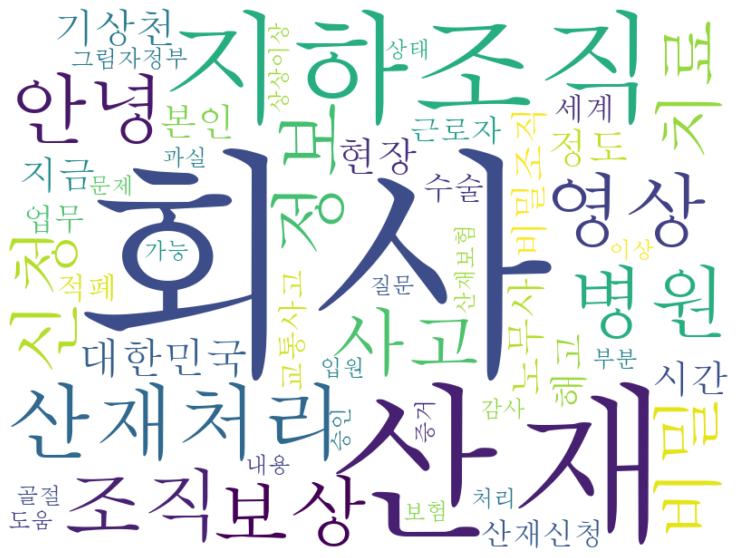

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(answer_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')  # 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

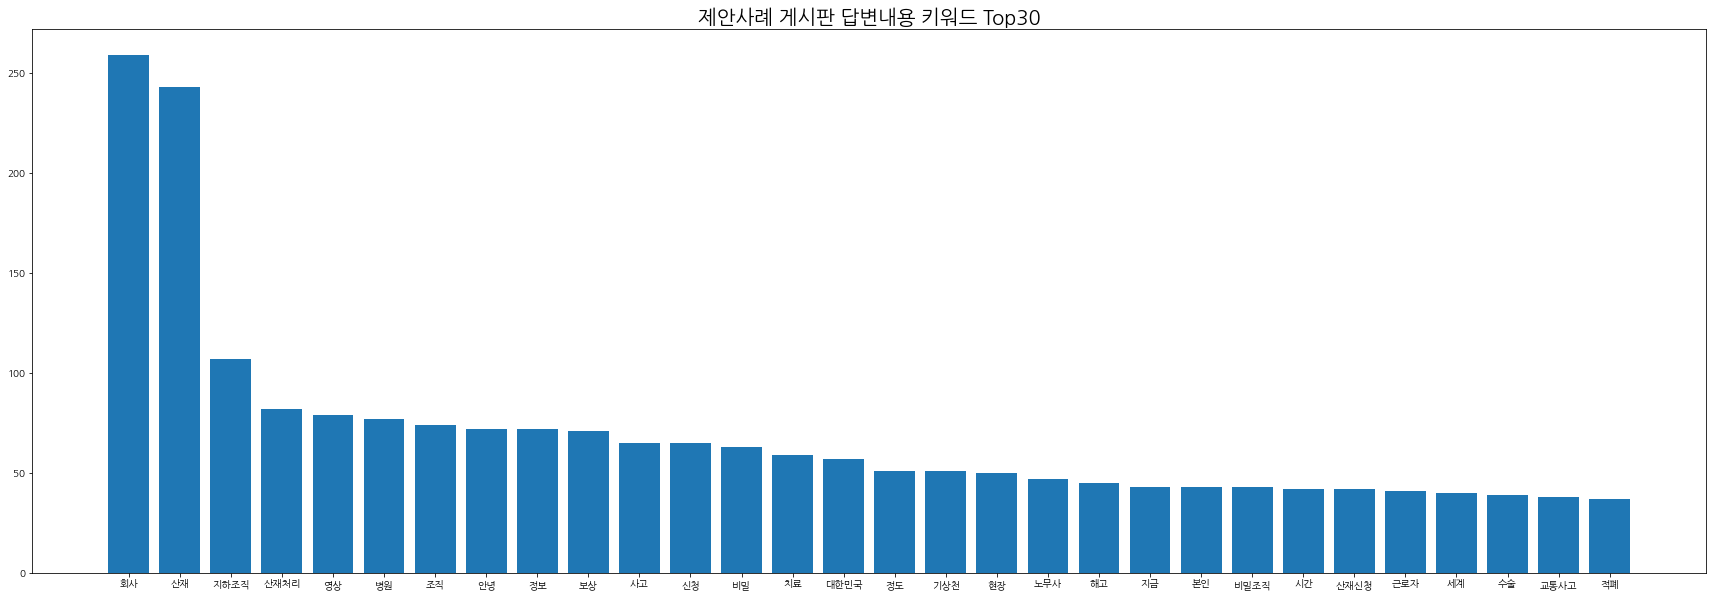

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_title_keys=[i for i in answer_top50.keys()]
top_title_values=[i for i in answer_top50.values()]

plt.figure(figsize= (30,10))
plt.title("제안사례 게시판 답변내용 키워드 Top30", fontsize=20)
plt.bar(list(top_title_keys[:30]), list(top_title_values[:30]))
plt.show()

In [8]:
#content_top_100 

answer_top50_word2id = {w: i for i, w in enumerate(answer_top50.keys())}
answer_top50_word2id

{'회사': 0,
 '산재': 1,
 '지하조직': 2,
 '산재처리': 3,
 '영상': 4,
 '병원': 5,
 '조직': 6,
 '안녕': 7,
 '정보': 8,
 '보상': 9,
 '사고': 10,
 '신청': 11,
 '비밀': 12,
 '치료': 13,
 '대한민국': 14,
 '정도': 15,
 '기상천': 16,
 '현장': 17,
 '노무사': 18,
 '해고': 19,
 '지금': 20,
 '본인': 21,
 '비밀조직': 22,
 '시간': 23,
 '산재신청': 24,
 '근로자': 25,
 '세계': 26,
 '수술': 27,
 '교통사고': 28,
 '적폐': 29,
 '업무': 30,
 '그림자정부': 31,
 '감사': 32,
 '부분': 33,
 '도움': 34,
 '처리': 35,
 '산재보험': 36,
 '골절': 37,
 '승인': 38,
 '내용': 39,
 '상상이상': 40,
 '입원': 41,
 '상태': 42,
 '보험': 43,
 '질문': 44,
 '과실': 45,
 '가능': 46,
 '문제': 47,
 '이상': 48,
 '증거': 49}

In [9]:
#content_top_100 

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '산재': 1,
 '지하조직': 2,
 '산재처리': 3,
 '영상': 4,
 '병원': 5,
 '조직': 6,
 '안녕': 7,
 '정보': 8,
 '보상': 9,
 '사고': 10,
 '신청': 11,
 '비밀': 12,
 '치료': 13,
 '대한민국': 14,
 '정도': 15,
 '기상천': 16,
 '현장': 17,
 '노무사': 18,
 '해고': 19,
 '지금': 20,
 '본인': 21,
 '비밀조직': 22,
 '시간': 23,
 '산재신청': 24,
 '근로자': 25,
 '세계': 26,
 '수술': 27,
 '교통사고': 28,
 '적폐': 29}

In [10]:

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'회사': 0,
 '산재': 1,
 '지하조직': 2,
 '산재처리': 3,
 '영상': 4,
 '병원': 5,
 '조직': 6,
 '안녕': 7,
 '정보': 8,
 '보상': 9,
 '사고': 10,
 '신청': 11,
 '비밀': 12,
 '치료': 13,
 '대한민국': 14,
 '정도': 15,
 '기상천': 16,
 '현장': 17,
 '노무사': 18,
 '해고': 19,
 '지금': 20,
 '본인': 21,
 '비밀조직': 22,
 '시간': 23,
 '산재신청': 24,
 '근로자': 25,
 '세계': 26,
 '수술': 27,
 '교통사고': 28,
 '적폐': 29}

In [11]:
answer_top50_id2word = {i: w for i, w in enumerate(answer_top50.keys())}
answer_top50_id2word

{0: '회사',
 1: '산재',
 2: '지하조직',
 3: '산재처리',
 4: '영상',
 5: '병원',
 6: '조직',
 7: '안녕',
 8: '정보',
 9: '보상',
 10: '사고',
 11: '신청',
 12: '비밀',
 13: '치료',
 14: '대한민국',
 15: '정도',
 16: '기상천',
 17: '현장',
 18: '노무사',
 19: '해고',
 20: '지금',
 21: '본인',
 22: '비밀조직',
 23: '시간',
 24: '산재신청',
 25: '근로자',
 26: '세계',
 27: '수술',
 28: '교통사고',
 29: '적폐',
 30: '업무',
 31: '그림자정부',
 32: '감사',
 33: '부분',
 34: '도움',
 35: '처리',
 36: '산재보험',
 37: '골절',
 38: '승인',
 39: '내용',
 40: '상상이상',
 41: '입원',
 42: '상태',
 43: '보험',
 44: '질문',
 45: '과실',
 46: '가능',
 47: '문제',
 48: '이상',
 49: '증거'}

In [12]:
answer_top30_id2word = {i: w for i, w in enumerate(answer_top30.keys())}
answer_top30_id2word

{0: '회사',
 1: '산재',
 2: '지하조직',
 3: '산재처리',
 4: '영상',
 5: '병원',
 6: '조직',
 7: '안녕',
 8: '정보',
 9: '보상',
 10: '사고',
 11: '신청',
 12: '비밀',
 13: '치료',
 14: '대한민국',
 15: '정도',
 16: '기상천',
 17: '현장',
 18: '노무사',
 19: '해고',
 20: '지금',
 21: '본인',
 22: '비밀조직',
 23: '시간',
 24: '산재신청',
 25: '근로자',
 26: '세계',
 27: '수술',
 28: '교통사고',
 29: '적폐'}

In [13]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top50_word2id.items():
        if wi in sentence:
            for wj, j in answer_top50_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_50[i][j] += 1
answer_adjacent_matrix_50

array([[ 0, 42,  0, ...,  4,  8,  4],
       [42,  0,  0, ...,  1,  1,  2],
       [ 0,  0,  0, ...,  0,  1,  0],
       ...,
       [ 4,  1,  0, ...,  0,  1,  0],
       [ 8,  1,  1, ...,  1,  0,  0],
       [ 4,  2,  0, ...,  0,  0,  0]])

In [14]:
answer_sentences_nouns_result

[['안녕', '김노무사', '여기저기', '영상', '정보'],
 [],
 ['가족도',
  '산재처리',
  '아버지',
  '회사',
  '중요직책',
  '최근',
  '재정악화',
  '인원',
  '감축',
  '통보',
  '업무',
  '아버지'],
 [],
 ['와중', '혈압', '뇌출혈', '문제', '당일', '근무', '근무'],
 [],
 [],
 ['혈압', '업무', '연관', '케이스가', '가능성'],
 [],
 [],
 ['답변'],
 ['정확'],
 ['산재보험',
  '작년',
  '출근길',
  '빙판',
  '발목',
  '골절',
  '수술',
  '정도',
  '사고',
  '출근길',
  '사고',
  '산재처리',
  '동안',
  '요양',
  '휴업급여'],
 ['수술비'],
 ['치료비', '산재', '산재치료', '장해', '보상제도', '산재', '보상금', '근로복지공단', '심사'],
 ['영상'],
 [],
 ['구독'],
 ['정도', '자재', '한쪽', '이동', '허리'],
 ['자리', '구급차', '조치', '상황', '회사', '대리', '타서', '병원'],
 ['평소', '습관', '병원', '엑스레이', '시간', '증상', '병원', '입원'],
 ['병원', '산재처리'],
 ['하청', '하청'],
 [],
 [],
 ['안녕'],
 ['영상'],
 ['병원', '회상', '말해', '산재', '접수', '회사', '공상처리', '보험금', '환수'],
 [],
 ['안녕하세',
  '현장',
  '안전모',
  '상태',
  '머리',
  '바늘',
  '원청',
  '산재처리',
  '현장',
  '소장',
  '며칠',
  '두통',
  '어지러움증상',
  '책임',
  '팀장',
  '하도급',
  '주지',
  '고용',
  '고요',
  '원청',
  '산재',
  '사업관리장',
  '번호',
  '지네',
  '현장소장',
  '현장소장',
  '사업장관리번호

In [15]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top30_word2id.items():
        if wi in sentence:
            for wj, j in answer_top30_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_30[i][j] += 1
answer_adjacent_matrix_30

array([[ 0, 42,  0, 15,  4, 12,  0,  8,  0,  9,  9, 10,  0, 11,  1,  5,
         0,  3,  2,  6, 10,  4,  0,  4, 16, 10,  0,  6,  4,  1],
       [42,  0,  0,  3,  5,  8,  0,  8,  3, 16,  7, 27,  0, 15,  0,  7,
         0,  6,  8,  2, 10,  6,  0,  1,  5,  6,  0,  6,  9,  0],
       [ 0,  0,  0,  0,  0,  1, 30,  0,  7,  0,  3,  0, 22,  0, 25,  0,
        19,  0,  0,  0,  0,  0, 14,  0,  0,  0, 13,  0,  0, 10],
       [15,  3,  0,  0,  1, 13,  0,  1,  0,  1,  5,  2,  0,  2,  0,  3,
         0,  1,  1,  0,  2,  0,  0,  2,  1,  0,  0,  1,  0,  0],
       [ 4,  5,  0,  1,  0,  1,  0,  4,  3,  0,  2,  1,  0,  0,  0,  0,
         0,  0,  2,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,  0],
       [12,  8,  1, 13,  1,  0,  1,  1,  0,  1,  1,  1,  0,  6,  0,  2,
         1,  3,  2,  0,  4,  0,  0,  2,  5,  0,  0,  2,  0,  0],
       [ 0,  0, 30,  0,  0,  1,  0,  0,  7,  0,  3,  0, 19,  0, 20,  0,
        16,  0,  0,  0,  0,  0, 14,  0,  0,  0, 13,  0,  0,  8],
       [ 8,  8,  0,  1,  4,  1,  0,  0,  

In [16]:
answer_adjacent_matrix_50.shape, answer_adjacent_matrix_30.shape

((50, 50), (30, 30))

In [17]:
import networkx as nx
answer_network_30 = nx.from_numpy_matrix(answer_adjacent_matrix_30)
list(answer_network_30.adjacency())

[(0,
  {1: {'weight': 42},
   3: {'weight': 15},
   4: {'weight': 4},
   5: {'weight': 12},
   7: {'weight': 8},
   9: {'weight': 9},
   10: {'weight': 9},
   11: {'weight': 10},
   13: {'weight': 11},
   14: {'weight': 1},
   15: {'weight': 5},
   17: {'weight': 3},
   18: {'weight': 2},
   19: {'weight': 6},
   20: {'weight': 10},
   21: {'weight': 4},
   23: {'weight': 4},
   24: {'weight': 16},
   25: {'weight': 10},
   27: {'weight': 6},
   28: {'weight': 4},
   29: {'weight': 1}}),
 (1,
  {0: {'weight': 42},
   3: {'weight': 3},
   4: {'weight': 5},
   5: {'weight': 8},
   7: {'weight': 8},
   8: {'weight': 3},
   9: {'weight': 16},
   10: {'weight': 7},
   11: {'weight': 27},
   13: {'weight': 15},
   15: {'weight': 7},
   17: {'weight': 6},
   18: {'weight': 8},
   19: {'weight': 2},
   20: {'weight': 10},
   21: {'weight': 6},
   23: {'weight': 1},
   24: {'weight': 5},
   25: {'weight': 6},
   27: {'weight': 6},
   28: {'weight': 9}}),
 (2,
  {5: {'weight': 1},
   6: {'weight

In [18]:
answer_network_50 = nx.from_numpy_matrix(answer_adjacent_matrix_50)
list(answer_network_50.adjacency())

[(0,
  {1: {'weight': 42},
   3: {'weight': 15},
   4: {'weight': 4},
   5: {'weight': 12},
   7: {'weight': 8},
   9: {'weight': 9},
   10: {'weight': 9},
   11: {'weight': 10},
   13: {'weight': 11},
   14: {'weight': 1},
   15: {'weight': 5},
   17: {'weight': 3},
   18: {'weight': 2},
   19: {'weight': 6},
   20: {'weight': 10},
   21: {'weight': 4},
   23: {'weight': 4},
   24: {'weight': 16},
   25: {'weight': 10},
   27: {'weight': 6},
   28: {'weight': 4},
   29: {'weight': 1},
   30: {'weight': 6},
   32: {'weight': 1},
   33: {'weight': 8},
   34: {'weight': 4},
   35: {'weight': 13},
   36: {'weight': 2},
   37: {'weight': 2},
   38: {'weight': 8},
   39: {'weight': 1},
   41: {'weight': 7},
   42: {'weight': 2},
   43: {'weight': 6},
   44: {'weight': 5},
   45: {'weight': 4},
   46: {'weight': 2},
   47: {'weight': 4},
   48: {'weight': 8},
   49: {'weight': 4}}),
 (1,
  {0: {'weight': 42},
   3: {'weight': 3},
   4: {'weight': 5},
   5: {'weight': 8},
   7: {'weight': 8},

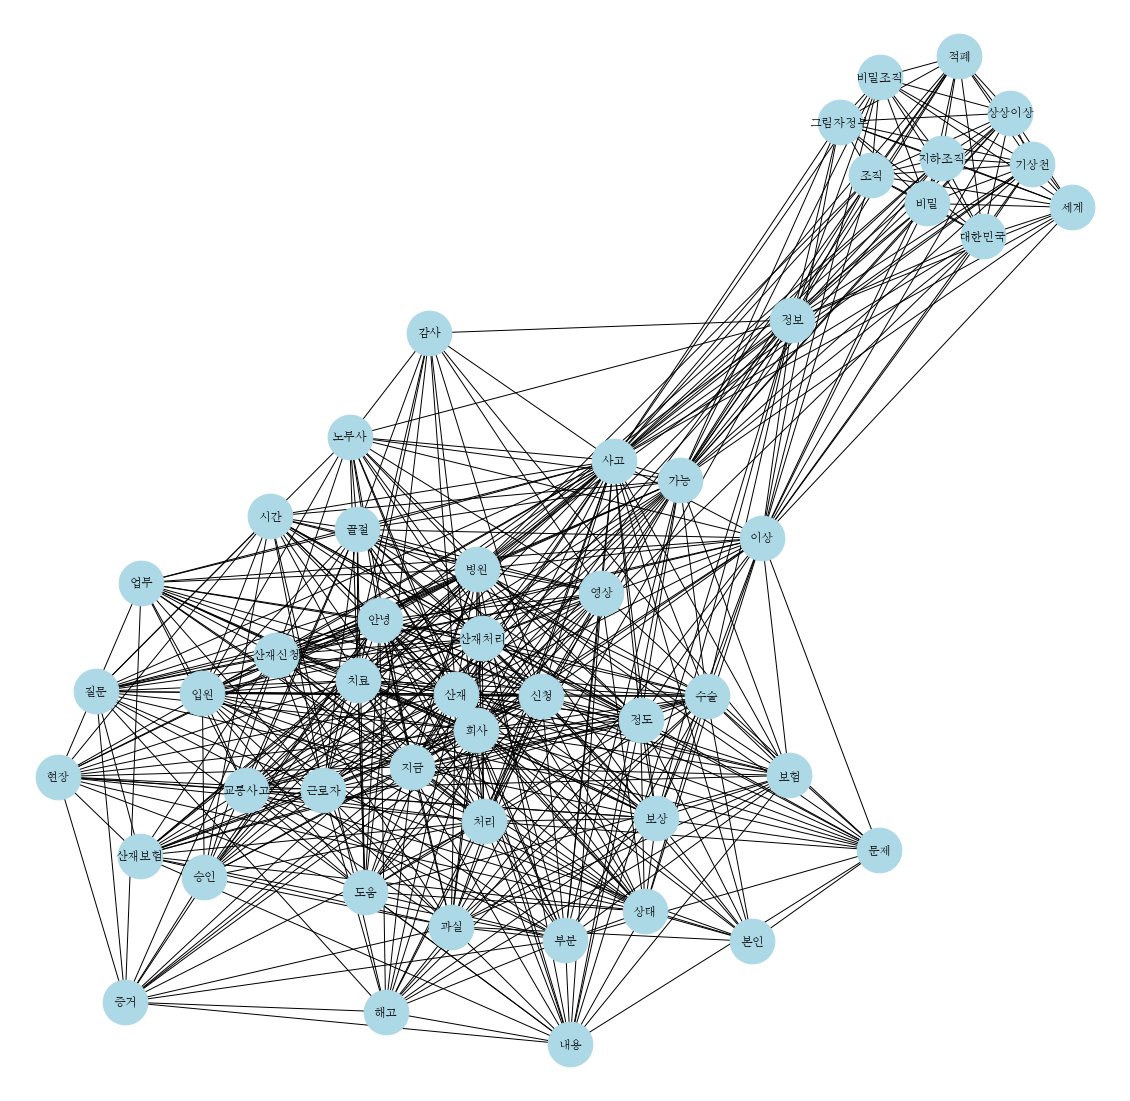

In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_50, labels=answer_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

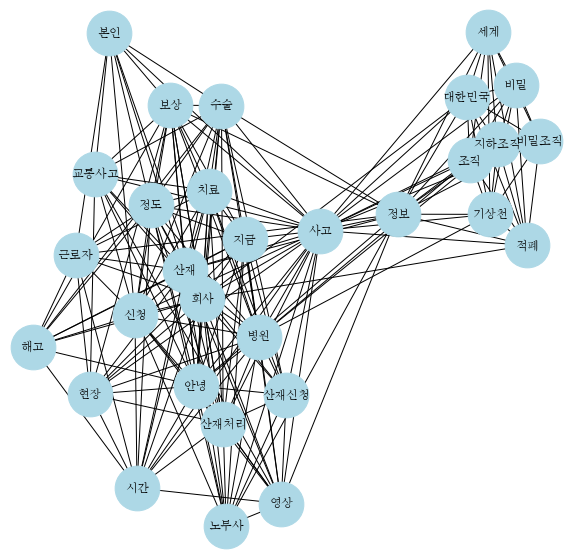

In [20]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 30개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_30, labels=answer_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

# 근접중심성

In [21]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.4152542372881356,
 1: 0.4666666666666667,
 2: 0.4260869565217391,
 3: 0.5632183908045977,
 4: 0.5212765957446809,
 5: 0.5212765957446809,
 6: 0.4260869565217391,
 7: 0.5157894736842106,
 8: 0.5104166666666666,
 9: 0.5444444444444444,
 10: 0.5104166666666666,
 11: 0.5632183908045977,
 12: 0.3951612903225806,
 13: 0.48514851485148514,
 14: 0.4152542372881356,
 15: 0.47115384615384615,
 16: 0.4260869565217391,
 17: 0.4803921568627451,
 18: 0.5444444444444444,
 19: 0.5104166666666666,
 20: 0.5051546391752577,
 21: 0.4224137931034483,
 22: 0.3951612903225806,
 23: 0.49,
 24: 0.532608695652174,
 25: 0.4298245614035088,
 26: 0.3951612903225806,
 27: 0.4537037037037037,
 28: 0.4803921568627451,
 29: 0.3161290322580645,
 30: 0.532608695652174,
 31: 0.3951612903225806,
 32: 0.4803921568627451,
 33: 0.5268817204301075,
 34: 0.5,
 35: 0.5,
 36: 0.5104166666666666,
 37: 0.5384615384615384,
 38: 0.48514851485148514,
 39: 0.5568181818181818,
 40: 0.3951612903225806,
 41: 0.5104166666666666,
 42

In [22]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.26126126126126126,
 1: 0.2871287128712871,
 2: 0.31521739130434784,
 3: 0.4142857142857143,
 4: 0.4142857142857143,
 5: 0.453125,
 6: 0.31521739130434784,
 7: 0.42028985507246375,
 8: 0.3493975903614458,
 9: 0.43283582089552236,
 10: 0.4603174603174603,
 11: 0.4393939393939394,
 12: 0.19727891156462585,
 13: 0.32954545454545453,
 14: 0.2248062015503876,
 15: 0.35802469135802467,
 16: 0.31521739130434784,
 17: 0.43283582089552236,
 18: 0.3918918918918919,
 19: 0.4084507042253521,
 20: 0.3972602739726027,
 21: 0.37662337662337664,
 22: 0.19727891156462585,
 23: 0.3918918918918919,
 24: 0.3815789473684211,
 25: 0.32222222222222224,
 26: 0.2,
 27: 0.3972602739726027,
 28: 0.4027777777777778,
 29: 0.26851851851851855}

# 연결중심성

In [23]:
#Degree
nx.degree_centrality(answer_network_50)

{0: 0.8163265306122448,
 1: 0.7959183673469387,
 2: 0.2857142857142857,
 3: 0.5918367346938775,
 4: 0.4693877551020408,
 5: 0.6530612244897959,
 6: 0.2857142857142857,
 7: 0.6122448979591836,
 8: 0.4693877551020408,
 9: 0.4897959183673469,
 10: 0.836734693877551,
 11: 0.6530612244897959,
 12: 0.26530612244897955,
 13: 0.5714285714285714,
 14: 0.2857142857142857,
 15: 0.4693877551020408,
 16: 0.2857142857142857,
 17: 0.3469387755102041,
 18: 0.3877551020408163,
 19: 0.3469387755102041,
 20: 0.5306122448979591,
 21: 0.24489795918367346,
 22: 0.26530612244897955,
 23: 0.4081632653061224,
 24: 0.44897959183673464,
 25: 0.3469387755102041,
 26: 0.26530612244897955,
 27: 0.5306122448979591,
 28: 0.4081632653061224,
 29: 0.26530612244897955,
 30: 0.3877551020408163,
 31: 0.26530612244897955,
 32: 0.24489795918367346,
 33: 0.4693877551020408,
 34: 0.4081632653061224,
 35: 0.5714285714285714,
 36: 0.36734693877551017,
 37: 0.4693877551020408,
 38: 0.3061224489795918,
 39: 0.3877551020408163,
 4

In [24]:
#Degree
nx.degree_centrality(answer_network_30)

{0: 0.7586206896551724,
 1: 0.7241379310344828,
 2: 0.3448275862068966,
 3: 0.5517241379310345,
 4: 0.4482758620689655,
 5: 0.6551724137931034,
 6: 0.3448275862068966,
 7: 0.6551724137931034,
 8: 0.5517241379310345,
 9: 0.5517241379310345,
 10: 0.9310344827586207,
 11: 0.5862068965517241,
 12: 0.3103448275862069,
 13: 0.5172413793103449,
 14: 0.3448275862068966,
 15: 0.5517241379310345,
 16: 0.3448275862068966,
 17: 0.3793103448275862,
 18: 0.41379310344827586,
 19: 0.3448275862068966,
 20: 0.5172413793103449,
 21: 0.3103448275862069,
 22: 0.3103448275862069,
 23: 0.4482758620689655,
 24: 0.3793103448275862,
 25: 0.3448275862068966,
 26: 0.3103448275862069,
 27: 0.5517241379310345,
 28: 0.3793103448275862,
 29: 0.3448275862068966}

# 위세중심성

In [25]:
#Eigenvector
nx.eigenvector_centrality(answer_network_50, weight='weight')

{0: 0.08263774521889436,
 1: 0.08710726305790335,
 2: 0.4135037350532872,
 3: 0.027859351113261165,
 4: 0.016729128119859004,
 5: 0.03818454022033563,
 6: 0.38440538677483416,
 7: 0.024621694259476128,
 8: 0.16309189260062593,
 9: 0.02696752317664579,
 10: 0.09813731667466141,
 11: 0.039465524404522605,
 12: 0.3375258355733874,
 13: 0.03328096429962121,
 14: 0.33843251844480704,
 15: 0.023313815399629224,
 16: 0.30111974601156244,
 17: 0.011050397342385441,
 18: 0.016243364891537285,
 19: 0.008923523151967526,
 20: 0.026898163004697884,
 21: 0.012233052767577579,
 22: 0.251547443109871,
 23: 0.012995070683506823,
 24: 0.023670124277257093,
 25: 0.01819757065998228,
 26: 0.24079268474686977,
 27: 0.02061050794518312,
 28: 0.01642404572121631,
 29: 0.16846513822840628,
 30: 0.013163551720569277,
 31: 0.2702385254151544,
 32: 0.012590097944238116,
 33: 0.011599495023862304,
 34: 0.010828142378731464,
 35: 0.031156843168374995,
 36: 0.011145659343019889,
 37: 0.01705835385267329,
 38: 0.01

In [26]:
#Eigenvector
nx.eigenvector_centrality(answer_network_30, weight='weight')

{0: 0.08451379849303191,
 1: 0.0856318153023183,
 2: 0.45205437124129283,
 3: 0.029133997791389834,
 4: 0.017663703629103807,
 5: 0.03990805489706259,
 6: 0.41974270922291834,
 7: 0.0275295206887542,
 8: 0.1727294249309029,
 9: 0.02985175833229177,
 10: 0.10278527539418968,
 11: 0.03865115493210793,
 12: 0.36485300092660194,
 13: 0.03618656942424325,
 14: 0.378297635007293,
 15: 0.023585748779807677,
 16: 0.31832445431833284,
 17: 0.012201325367463236,
 18: 0.01792819504240834,
 19: 0.00917687743455291,
 20: 0.030006442914843973,
 21: 0.013921567786851757,
 22: 0.26928431145521625,
 23: 0.01216457843948479,
 24: 0.023813416074124925,
 25: 0.017681720937824,
 26: 0.2638315597257149,
 27: 0.019868717793989042,
 28: 0.015913404414115498,
 29: 0.18390845321160093}

# 근접중심성

In [27]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_50)

{0: 0.2523266993733431,
 1: 0.24931658685147054,
 2: 0.1501515258914993,
 3: 0.22421340232840367,
 4: 0.20369980177082833,
 5: 0.2345830042557156,
 6: 0.15015152589149933,
 7: 0.22689995950772618,
 8: 0.20218290865775101,
 9: 0.2077428817748412,
 10: 0.25636376351138784,
 11: 0.23273399598561603,
 12: 0.1426491117937977,
 13: 0.2209968241125618,
 14: 0.1503135738136853,
 15: 0.20399094803152532,
 16: 0.1501515258914993,
 17: 0.1758496408299887,
 18: 0.18708694221822808,
 19: 0.17585751034775465,
 20: 0.21475218524769887,
 21: 0.14470779622761082,
 22: 0.1426491117937976,
 23: 0.19094729045754605,
 24: 0.19980286328597632,
 25: 0.1761818718838945,
 26: 0.1426491117937976,
 27: 0.21522755093707213,
 28: 0.1908547824520583,
 29: 0.14347002004480872,
 30: 0.1863813809537165,
 31: 0.14264911179379805,
 32: 0.14515341899958573,
 33: 0.20329653840974654,
 34: 0.19027276035670096,
 35: 0.2206619794498242,
 36: 0.1811896073405473,
 37: 0.20385286847364917,
 38: 0.16454852196168743,
 39: 0.18644

In [28]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_30)

{0: 0.25513589869051323,
 1: 0.24813271738226653,
 2: 0.16757301952111525,
 3: 0.2225029278395445,
 4: 0.20490009035105894,
 5: 0.24391356587563015,
 6: 0.1675730195211152,
 7: 0.23935641502227623,
 8: 0.22473375308821603,
 9: 0.22386406883381413,
 10: 0.2780762281789493,
 11: 0.22800546798440344,
 12: 0.15544897710558908,
 13: 0.21672078970573436,
 14: 0.16802817774417517,
 15: 0.2223582843644515,
 16: 0.16757301952111506,
 17: 0.18799272917871018,
 18: 0.1973781039108418,
 19: 0.17727739930472203,
 20: 0.21659072098920581,
 21: 0.1683609022636588,
 22: 0.1554489771055891,
 23: 0.20317944131934543,
 24: 0.18770126402162696,
 25: 0.17832223469803798,
 26: 0.15544897710558908,
 27: 0.22389542804311652,
 28: 0.18742923845535625,
 29: 0.16802817774417525}

In [29]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.4152542372881356,
 1: 0.4666666666666667,
 2: 0.4260869565217391,
 3: 0.5632183908045977,
 4: 0.5212765957446809,
 5: 0.5212765957446809,
 6: 0.4260869565217391,
 7: 0.5157894736842106,
 8: 0.5104166666666666,
 9: 0.5444444444444444,
 10: 0.5104166666666666,
 11: 0.5632183908045977,
 12: 0.3951612903225806,
 13: 0.48514851485148514,
 14: 0.4152542372881356,
 15: 0.47115384615384615,
 16: 0.4260869565217391,
 17: 0.4803921568627451,
 18: 0.5444444444444444,
 19: 0.5104166666666666,
 20: 0.5051546391752577,
 21: 0.4224137931034483,
 22: 0.3951612903225806,
 23: 0.49,
 24: 0.532608695652174,
 25: 0.4298245614035088,
 26: 0.3951612903225806,
 27: 0.4537037037037037,
 28: 0.4803921568627451,
 29: 0.3161290322580645,
 30: 0.532608695652174,
 31: 0.3951612903225806,
 32: 0.4803921568627451,
 33: 0.5268817204301075,
 34: 0.5,
 35: 0.5,
 36: 0.5104166666666666,
 37: 0.5384615384615384,
 38: 0.48514851485148514,
 39: 0.5568181818181818,
 40: 0.3951612903225806,
 41: 0.5104166666666666,
 42

In [30]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.26126126126126126,
 1: 0.2871287128712871,
 2: 0.31521739130434784,
 3: 0.4142857142857143,
 4: 0.4142857142857143,
 5: 0.453125,
 6: 0.31521739130434784,
 7: 0.42028985507246375,
 8: 0.3493975903614458,
 9: 0.43283582089552236,
 10: 0.4603174603174603,
 11: 0.4393939393939394,
 12: 0.19727891156462585,
 13: 0.32954545454545453,
 14: 0.2248062015503876,
 15: 0.35802469135802467,
 16: 0.31521739130434784,
 17: 0.43283582089552236,
 18: 0.3918918918918919,
 19: 0.4084507042253521,
 20: 0.3972602739726027,
 21: 0.37662337662337664,
 22: 0.19727891156462585,
 23: 0.3918918918918919,
 24: 0.3815789473684211,
 25: 0.32222222222222224,
 26: 0.2,
 27: 0.3972602739726027,
 28: 0.4027777777777778,
 29: 0.26851851851851855}

# 매개중심성

In [31]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_50)

{0: 0.07744951625828965,
 1: 0.06735401082268463,
 2: 0.03223769723120824,
 3: 0.04591316863954992,
 4: 0.03942307273705723,
 5: 0.07044543699431122,
 6: 0.03223769723120825,
 7: 0.04894338559025551,
 8: 0.0821747778307488,
 9: 0.04179560537692525,
 10: 0.1301830005954815,
 11: 0.054440422525340426,
 12: 0.027609905131493796,
 13: 0.04559636867736184,
 14: 0.03248002841883431,
 15: 0.03939161356589765,
 16: 0.03223769723120824,
 17: 0.02883561652754216,
 18: 0.03524521377163953,
 19: 0.029191378909557055,
 20: 0.04339327319077945,
 21: 0.02104333047283686,
 22: 0.027609905131493778,
 23: 0.03366577729045379,
 24: 0.036884874942185224,
 25: 0.035090860925750256,
 26: 0.02760990513149379,
 27: 0.04544064324288349,
 28: 0.03367443517073087,
 29: 0.029390891906888966,
 30: 0.030977727426492793,
 31: 0.02760990513149379,
 32: 0.02329542920497944,
 33: 0.038428965210453914,
 34: 0.03315933924884351,
 35: 0.045259259910751685,
 36: 0.028738590592749125,
 37: 0.04046089993891753,
 38: 0.023805

In [32]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_30)

{0: 0.11649487825255055,
 1: 0.0888766125681012,
 2: 0.054445092183025644,
 3: 0.05889088601597991,
 4: 0.05741010368755931,
 5: 0.12020653582920764,
 6: 0.05444509218302564,
 7: 0.07768260024121283,
 8: 0.1492650046343076,
 9: 0.06827635166725149,
 10: 0.23354430783833552,
 11: 0.06886127155952881,
 12: 0.04404026461105277,
 13: 0.057168378191748255,
 14: 0.05585897355360865,
 15: 0.06332015068657772,
 16: 0.05444509218302625,
 17: 0.045156102390914915,
 18: 0.051648688760096026,
 19: 0.0380603017579253,
 20: 0.05819347516368418,
 21: 0.03725161839320645,
 22: 0.04404026461105277,
 23: 0.052554140636435445,
 24: 0.041366561241745245,
 25: 0.0492470599772468,
 26: 0.04404026461105279,
 27: 0.06853018518017763,
 28: 0.04483142701459592,
 29: 0.0558589735536087}

In [33]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(answer_network_50)

{0: 0.7535355118012188,
 1: 0.7493149878308135,
 2: 0.08635970918404112,
 3: 0.5875718232277054,
 4: 0.4170349582444364,
 5: 0.6157678144881886,
 6: 0.08635970918404037,
 7: 0.5848282869295753,
 8: 0.2625531774827117,
 9: 0.44878065626719055,
 10: 0.7158297845852979,
 11: 0.6244405705523282,
 12: 0.06626010946681182,
 13: 0.5481324958284064,
 14: 0.090540976379292,
 15: 0.4296038683670031,
 16: 0.08635970918404087,
 17: 0.26588164644869355,
 18: 0.33614327191044857,
 19: 0.25444409605557083,
 20: 0.5016891516615604,
 21: 0.14625426292210597,
 22: 0.06626010946681189,
 23: 0.35267998033043174,
 24: 0.41136972227331864,
 25: 0.22261832780606897,
 26: 0.06626010946681216,
 27: 0.5086723417548362,
 28: 0.34873599102397257,
 29: 0.07388455382320347,
 30: 0.3398213968854077,
 31: 0.06626010946681213,
 32: 0.14425147652407314,
 33: 0.41090999138293005,
 34: 0.3314743485884091,
 35: 0.5445251953337126,
 36: 0.3044540963621004,
 37: 0.41760285885999626,
 38: 0.23796551205933722,
 39: 0.28329299

In [34]:
G1_answer_50words=nx.Graph(answer_network_50, labels=answer_top50_word2id, font_family=font_name, ax=ax)
G1_answer_50words

In [35]:
G1_answer_30words=nx.Graph(answer_network_30, labels=answer_top30_word2id, font_family=font_name, ax=ax)
G1_answer_30words

In [36]:
# nx.write_gexf(G1_answer_50words, '산업재해보상보험_50keyword_graph.gexf')

In [37]:
# nx.write_gexf(G1_answer_30words, '산업재해보상보험_30keyword_graph.gexf')

In [38]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top50_word2id.keys())
values = list(nx.degree_centrality(answer_network_50).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.8163265306122448,
 '산재': 0.7959183673469387,
 '지하조직': 0.2857142857142857,
 '산재처리': 0.5918367346938775,
 '영상': 0.4693877551020408,
 '병원': 0.6530612244897959,
 '조직': 0.2857142857142857,
 '안녕': 0.6122448979591836,
 '정보': 0.4693877551020408,
 '보상': 0.4897959183673469,
 '사고': 0.836734693877551,
 '신청': 0.6530612244897959,
 '비밀': 0.26530612244897955,
 '치료': 0.5714285714285714,
 '대한민국': 0.2857142857142857,
 '정도': 0.4693877551020408,
 '기상천': 0.2857142857142857,
 '현장': 0.3469387755102041,
 '노무사': 0.3877551020408163,
 '해고': 0.3469387755102041,
 '지금': 0.5306122448979591,
 '본인': 0.24489795918367346,
 '비밀조직': 0.26530612244897955,
 '시간': 0.4081632653061224,
 '산재신청': 0.44897959183673464,
 '근로자': 0.3469387755102041,
 '세계': 0.26530612244897955,
 '수술': 0.5306122448979591,
 '교통사고': 0.4081632653061224,
 '적폐': 0.26530612244897955,
 '업무': 0.3877551020408163,
 '그림자정부': 0.26530612244897955,
 '감사': 0.24489795918367346,
 '부분': 0.4693877551020408,
 '도움': 0.4081632653061224,
 '처리': 0.5714285714285714,
 '산

In [39]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top30_word2id.keys())
values = list(nx.degree_centrality(answer_network_30).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'회사': 0.7586206896551724,
 '산재': 0.7241379310344828,
 '지하조직': 0.3448275862068966,
 '산재처리': 0.5517241379310345,
 '영상': 0.4482758620689655,
 '병원': 0.6551724137931034,
 '조직': 0.3448275862068966,
 '안녕': 0.6551724137931034,
 '정보': 0.5517241379310345,
 '보상': 0.5517241379310345,
 '사고': 0.9310344827586207,
 '신청': 0.5862068965517241,
 '비밀': 0.3103448275862069,
 '치료': 0.5172413793103449,
 '대한민국': 0.3448275862068966,
 '정도': 0.5517241379310345,
 '기상천': 0.3448275862068966,
 '현장': 0.3793103448275862,
 '노무사': 0.41379310344827586,
 '해고': 0.3448275862068966,
 '지금': 0.5172413793103449,
 '본인': 0.3103448275862069,
 '비밀조직': 0.3103448275862069,
 '시간': 0.4482758620689655,
 '산재신청': 0.3793103448275862,
 '근로자': 0.3448275862068966,
 '세계': 0.3103448275862069,
 '수술': 0.5517241379310345,
 '교통사고': 0.3793103448275862,
 '적폐': 0.3448275862068966}

In [40]:
answer_top50_word2id

{'회사': 0,
 '산재': 1,
 '지하조직': 2,
 '산재처리': 3,
 '영상': 4,
 '병원': 5,
 '조직': 6,
 '안녕': 7,
 '정보': 8,
 '보상': 9,
 '사고': 10,
 '신청': 11,
 '비밀': 12,
 '치료': 13,
 '대한민국': 14,
 '정도': 15,
 '기상천': 16,
 '현장': 17,
 '노무사': 18,
 '해고': 19,
 '지금': 20,
 '본인': 21,
 '비밀조직': 22,
 '시간': 23,
 '산재신청': 24,
 '근로자': 25,
 '세계': 26,
 '수술': 27,
 '교통사고': 28,
 '적폐': 29,
 '업무': 30,
 '그림자정부': 31,
 '감사': 32,
 '부분': 33,
 '도움': 34,
 '처리': 35,
 '산재보험': 36,
 '골절': 37,
 '승인': 38,
 '내용': 39,
 '상상이상': 40,
 '입원': 41,
 '상태': 42,
 '보험': 43,
 '질문': 44,
 '과실': 45,
 '가능': 46,
 '문제': 47,
 '이상': 48,
 '증거': 49}

In [41]:
print(연결중심성.keys())

dict_keys(['회사', '산재', '지하조직', '산재처리', '영상', '병원', '조직', '안녕', '정보', '보상', '사고', '신청', '비밀', '치료', '대한민국', '정도', '기상천', '현장', '노무사', '해고', '지금', '본인', '비밀조직', '시간', '산재신청', '근로자', '세계', '수술', '교통사고', '적폐'])
